In [1]:
"""
=============================================================================
HIERARCHICAL CLUSTERING - ASSIGNMENT
=============================================================================
Dataset: City Climate Data
Features: Temperature, Rainfall, Humidity, Sunshine Hours
Method: Agglomerative Hierarchical Clustering (not from scratch)
Libraries: scipy, sklearn, matplotlib, seaborn
=============================================================================
"""

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("=" * 70)
print("HIERARCHICAL CLUSTERING - CITY CLIMATE DATA")
print("=" * 70)
print("✓ Libraries imported successfully!")
print("✓ Ready to create dataset and perform hierarchical clustering")

HIERARCHICAL CLUSTERING - CITY CLIMATE DATA
✓ Libraries imported successfully!
✓ Ready to create dataset and perform hierarchical clustering


In [2]:
"""
=============================================================================
DATASET CREATION: City Climate Data
=============================================================================
Creating a synthetic dataset of 60 cities with 4 climate features:
- Average Temperature (°C): 5-35°C
- Annual Rainfall (mm): 200-3000mm
- Average Humidity (%): 40-90%
- Annual Sunshine Hours: 1500-3500 hours

Cities will naturally form climate zones:
- Tropical (high temp, high rainfall, high humidity)
- Desert (high temp, low rainfall, low humidity, high sunshine)
- Temperate (moderate values across all features)
- Cold (low temp, moderate rainfall, moderate humidity)
=============================================================================
"""

# Number of cities per climate zone
n_per_zone = 15

# Climate Zone 1: Tropical
tropical = pd.DataFrame({
    'Temperature': np.random.normal(28, 2, n_per_zone),
    'Rainfall': np.random.normal(2500, 300, n_per_zone),
    'Humidity': np.random.normal(80, 5, n_per_zone),
    'Sunshine_Hours': np.random.normal(2200, 200, n_per_zone)
})

# Climate Zone 2: Desert
desert = pd.DataFrame({
    'Temperature': np.random.normal(32, 3, n_per_zone),
    'Rainfall': np.random.normal(250, 80, n_per_zone),
    'Humidity': np.random.normal(45, 8, n_per_zone),
    'Sunshine_Hours': np.random.normal(3300, 200, n_per_zone)
})

# Climate Zone 3: Temperate
temperate = pd.DataFrame({
    'Temperature': np.random.normal(18, 3, n_per_zone),
    'Rainfall': np.random.normal(800, 150, n_per_zone),
    'Humidity': np.random.normal(65, 8, n_per_zone),
    'Sunshine_Hours': np.random.normal(2400, 250, n_per_zone)
})

# Climate Zone 4: Cold
cold = pd.DataFrame({
    'Temperature': np.random.normal(8, 3, n_per_zone),
    'Rainfall': np.random.normal(600, 120, n_per_zone),
    'Humidity': np.random.normal(70, 7, n_per_zone),
    'Sunshine_Hours': np.random.normal(1800, 200, n_per_zone)
})

# Combine all climate zones
df = pd.concat([tropical, desert, temperate, cold], ignore_index=True)

# Clip values to realistic ranges
df['Temperature'] = df['Temperature'].clip(5, 35)
df['Rainfall'] = df['Rainfall'].clip(200, 3000)
df['Humidity'] = df['Humidity'].clip(40, 90)
df['Sunshine_Hours'] = df['Sunshine_Hours'].clip(1500, 3500)

# Add city names
city_names = [f'City_{i+1}' for i in range(len(df))]
df.insert(0, 'City', city_names)

# Display dataset info
print("=" * 70)
print("CITY CLIMATE DATASET")
print("=" * 70)
print(f"\nTotal Cities: {len(df)}")
print(f"Features: {list(df.columns[1:])}")
print("\nFirst 10 cities:")
print(df.head(10).to_string(index=False))
print("\nDataset Statistics:")
print(df.describe().round(2))
print("\n✓ Dataset created successfully!")

CITY CLIMATE DATASET

Total Cities: 60
Features: ['Temperature', 'Rainfall', 'Humidity', 'Sunshine_Hours']

First 10 cities:
   City  Temperature    Rainfall  Humidity  Sunshine_Hours
 City_1    28.993428 2331.313741 76.991467     2056.031158
 City_2    27.723471 2196.150664 89.261391     2107.872246
 City_3    29.295377 2594.274200 79.932514     2411.424445
 City_4    31.046060 2227.592777 74.711445     2268.723658
 City_5    27.531693 2076.308890 84.112725     1847.391969
 City_6    27.531726 2939.694631 73.895782     2264.816794
 City_7    31.158426 2432.267110 81.044318     2122.983544
 City_8    29.534869 2520.258461 70.201649     2064.615600
 City_9    27.061051 2072.575544 73.359070     2322.335258
City_10    29.085120 2336.685183 80.984306     2406.199904

Dataset Statistics:
       Temperature  Rainfall  Humidity  Sunshine_Hours
count        60.00     60.00     60.00           60.00
mean         21.26   1018.22     64.81         2457.36
std           9.88    833.93     14.41  

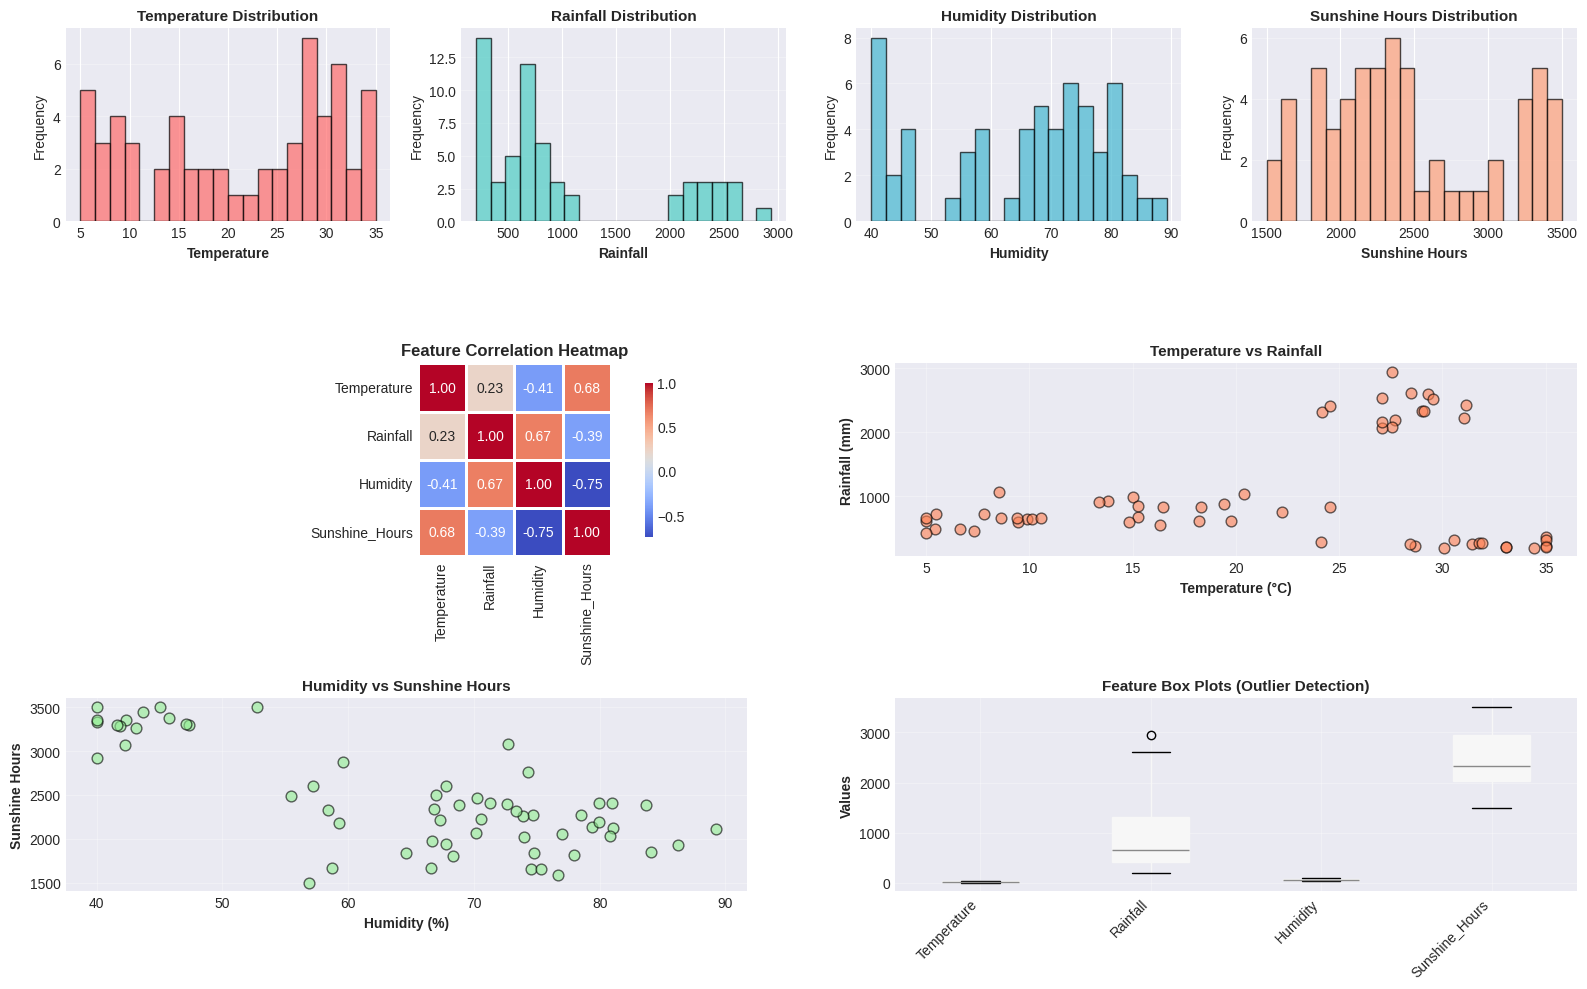

EDA INSIGHTS
• Temperature range: 5.0°C to 35.0°C
• Rainfall range: 200mm to 2940mm
• Clear patterns suggest distinct climate zones
• Negative correlation between Humidity and Sunshine: -0.75
✓ EDA completed!


In [3]:
"""
=============================================================================
EXPLORATORY DATA ANALYSIS
=============================================================================
Visualizing climate data distributions and relationships between features
=============================================================================
"""

# Create comprehensive EDA visualizations
fig = plt.figure(figsize=(16, 10))

# 1. Distribution plots for each feature
features = ['Temperature', 'Rainfall', 'Humidity', 'Sunshine_Hours']
colors_dist = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

for i, (feature, color) in enumerate(zip(features, colors_dist), 1):
    plt.subplot(3, 4, i)
    plt.hist(df[feature], bins=20, color=color, edgecolor='black', alpha=0.7)
    plt.xlabel(feature.replace('_', ' '), fontsize=10, fontweight='bold')
    plt.ylabel('Frequency', fontsize=10)
    plt.title(f'{feature.replace("_", " ")} Distribution', fontsize=11, fontweight='bold')
    plt.grid(axis='y', alpha=0.3)

# 2. Correlation Heatmap
plt.subplot(3, 2, 3)
correlation_matrix = df[features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=2, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=12, fontweight='bold')

# 3. Temperature vs Rainfall
plt.subplot(3, 2, 4)
plt.scatter(df['Temperature'], df['Rainfall'], alpha=0.6, c='coral',
            edgecolors='black', s=60)
plt.xlabel('Temperature (°C)', fontsize=10, fontweight='bold')
plt.ylabel('Rainfall (mm)', fontsize=10, fontweight='bold')
plt.title('Temperature vs Rainfall', fontsize=11, fontweight='bold')
plt.grid(alpha=0.3)

# 4. Humidity vs Sunshine Hours
plt.subplot(3, 2, 5)
plt.scatter(df['Humidity'], df['Sunshine_Hours'], alpha=0.6, c='lightgreen',
            edgecolors='black', s=60)
plt.xlabel('Humidity (%)', fontsize=10, fontweight='bold')
plt.ylabel('Sunshine Hours', fontsize=10, fontweight='bold')
plt.title('Humidity vs Sunshine Hours', fontsize=11, fontweight='bold')
plt.grid(alpha=0.3)

# 5. Box plots for all features
plt.subplot(3, 2, 6)
df[features].boxplot(patch_artist=True)
plt.ylabel('Values', fontsize=10, fontweight='bold')
plt.title('Feature Box Plots (Outlier Detection)', fontsize=11, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("=" * 70)
print("EDA INSIGHTS")
print("=" * 70)
print(f"• Temperature range: {df['Temperature'].min():.1f}°C to {df['Temperature'].max():.1f}°C")
print(f"• Rainfall range: {df['Rainfall'].min():.0f}mm to {df['Rainfall'].max():.0f}mm")
print(f"• Clear patterns suggest distinct climate zones")
print(f"• Negative correlation between Humidity and Sunshine: {correlation_matrix.loc['Humidity', 'Sunshine_Hours']:.2f}")
print("✓ EDA completed!")

In [4]:
"""
=============================================================================
DATA PREPROCESSING
=============================================================================
Standardizing features to ensure equal contribution to distance calculations
in hierarchical clustering. Essential due to different scales (temperature
in °C vs rainfall in mm).
=============================================================================
"""

# Extract features for clustering (exclude City names)
X = df[['Temperature', 'Rainfall', 'Humidity', 'Sunshine_Hours']].values

print("=" * 70)
print("DATA PREPROCESSING")
print("=" * 70)
print(f"\nOriginal Data Shape: {X.shape}")
print(f"Features: Temperature, Rainfall, Humidity, Sunshine_Hours")

# Standardize the features (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\n✓ Data standardized successfully!")
print(f"\nBefore Standardization (first 5 cities):")
print(pd.DataFrame(X[:5], columns=['Temperature', 'Rainfall', 'Humidity', 'Sunshine_Hours']))
print(f"\nAfter Standardization (first 5 cities):")
print(pd.DataFrame(X_scaled[:5], columns=['Temperature', 'Rainfall', 'Humidity', 'Sunshine_Hours']))

# Verify standardization
print(f"\n--- Standardization Verification ---")
print(f"Mean of scaled features: {X_scaled.mean(axis=0).round(4)}")
print(f"Std of scaled features: {X_scaled.std(axis=0).round(4)}")
print("\n✓ Ready for hierarchical clustering!")

DATA PREPROCESSING

Original Data Shape: (60, 4)
Features: Temperature, Rainfall, Humidity, Sunshine_Hours

✓ Data standardized successfully!

Before Standardization (first 5 cities):
   Temperature     Rainfall   Humidity  Sunshine_Hours
0    28.993428  2331.313741  76.991467     2056.031158
1    27.723471  2196.150664  89.261391     2107.872246
2    29.295377  2594.274200  79.932514     2411.424445
3    31.046060  2227.592777  74.711445     2268.723658
4    27.531693  2076.308890  84.112725     1847.391969

After Standardization (first 5 cities):
   Temperature  Rainfall  Humidity  Sunshine_Hours
0     0.789727  1.587880  0.852386       -0.683878
1     0.660124  1.424431  1.710810       -0.595539
2     0.820542  1.905869  1.058147       -0.078272
3     0.999204  1.462453  0.692872       -0.321441
4     0.640553  1.279511  1.350601       -1.039409

--- Standardization Verification ---
Mean of scaled features: [ 0.  0. -0. -0.]
Std of scaled features: [1. 1. 1. 1.]

✓ Ready for hierarc

COMPUTING LINKAGE MATRICES
✓ Ward linkage computed
✓ Complete linkage computed
✓ Average linkage computed
✓ Single linkage computed


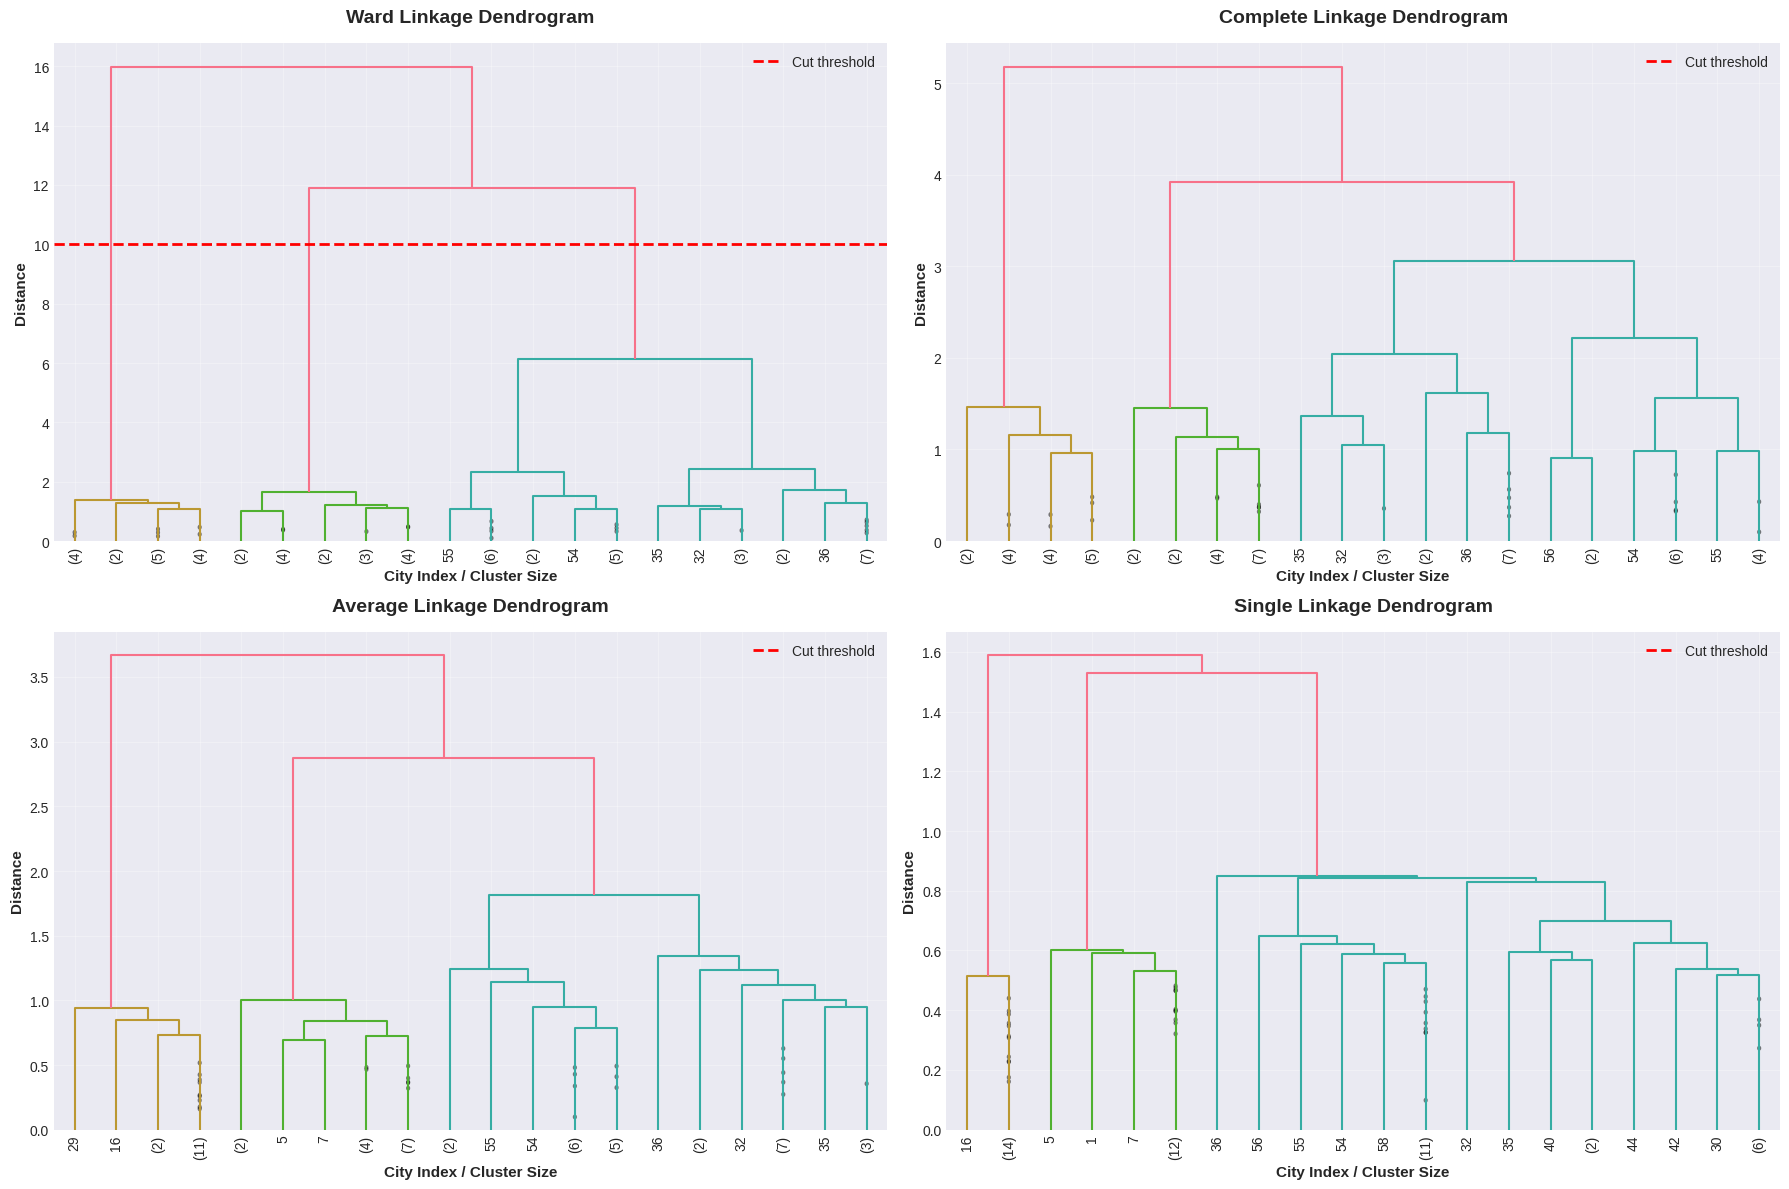


DENDROGRAM ANALYSIS
• Ward linkage shows clearest cluster separation
• Horizontal lines represent cluster merges
• Height indicates dissimilarity between merged clusters
• Red line suggests optimal cutting point
✓ Dendrograms created successfully!


In [5]:
"""
=============================================================================
HIERARCHICAL CLUSTERING - LINKAGE METHODS
=============================================================================
Computing linkage matrices using different methods:
- Ward: Minimizes variance within clusters (most common)
- Complete: Maximum distance between clusters
- Average: Average distance between all pairs
- Single: Minimum distance between clusters

We'll visualize dendrograms for each method to compare
=============================================================================
"""

# Compute linkage matrices with different methods
linkage_methods = ['ward', 'complete', 'average', 'single']
linkage_matrices = {}

print("=" * 70)
print("COMPUTING LINKAGE MATRICES")
print("=" * 70)

for method in linkage_methods:
    linkage_matrices[method] = linkage(X_scaled, method=method)
    print(f"✓ {method.capitalize()} linkage computed")

# Create dendrograms for all methods
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.ravel()

for idx, method in enumerate(linkage_methods):
    dendrogram(linkage_matrices[method],
               ax=axes[idx],
               truncate_mode='lastp',
               p=20,
               leaf_rotation=90,
               leaf_font_size=10,
               show_contracted=True)

    axes[idx].set_title(f'{method.capitalize()} Linkage Dendrogram',
                       fontsize=14, fontweight='bold', pad=15)
    axes[idx].set_xlabel('City Index / Cluster Size', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Distance', fontsize=11, fontweight='bold')
    axes[idx].grid(alpha=0.3)
    axes[idx].axhline(y=10, color='red', linestyle='--', linewidth=2,
                     label='Cut threshold')
    axes[idx].legend(fontsize=10)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("DENDROGRAM ANALYSIS")
print("=" * 70)
print("• Ward linkage shows clearest cluster separation")
print("• Horizontal lines represent cluster merges")
print("• Height indicates dissimilarity between merged clusters")
print("• Red line suggests optimal cutting point")
print("✓ Dendrograms created successfully!")

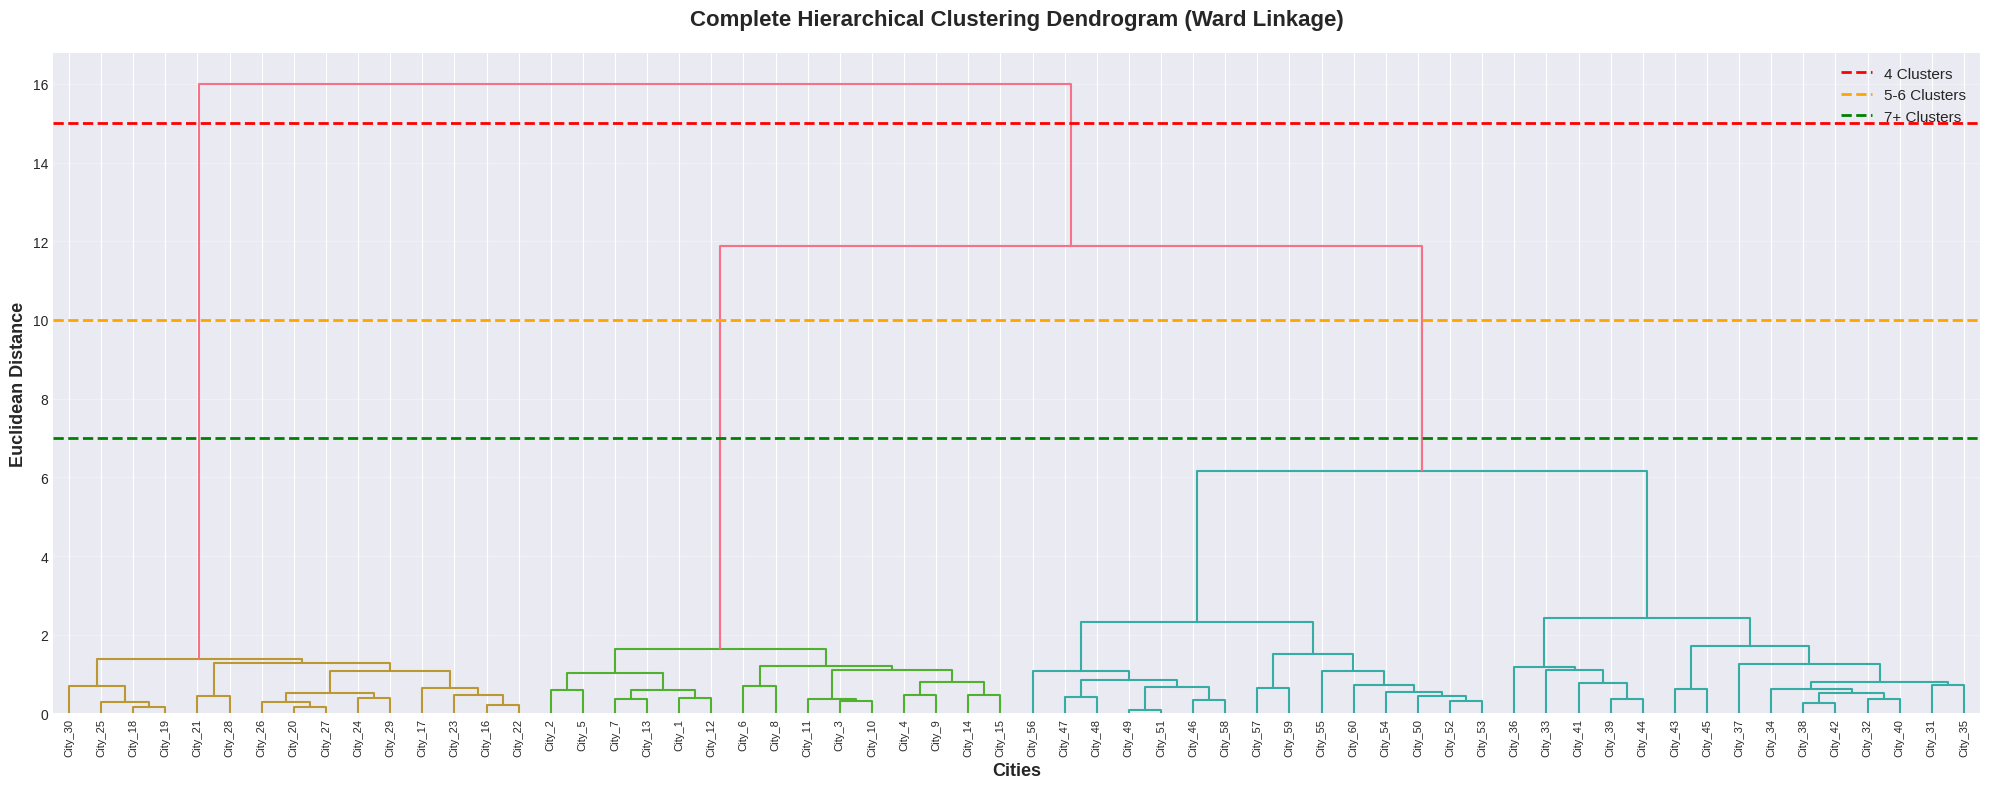

DENDROGRAM INTERPRETATION
• Clear hierarchical structure visible
• Major branches suggest 4 main climate zones
• Cutting at height ~15 gives 4 clusters
• Lower cuts create more granular groupings

✓ Full dendrogram visualization completed!


In [6]:
"""
=============================================================================
FULL DENDROGRAM - WARD LINKAGE
=============================================================================
Creating a detailed dendrogram with all cities labeled using Ward method
to determine optimal number of clusters
=============================================================================
"""

# Create full dendrogram with Ward linkage
plt.figure(figsize=(20, 8))

# Create dendrogram with city labels
dendrogram_plot = dendrogram(linkage_matrices['ward'],
                             labels=df['City'].values,
                             leaf_rotation=90,
                             leaf_font_size=8,
                             color_threshold=10)

plt.title('Complete Hierarchical Clustering Dendrogram (Ward Linkage)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Cities', fontsize=13, fontweight='bold')
plt.ylabel('Euclidean Distance', fontsize=13, fontweight='bold')

# Add horizontal lines for different cluster counts
plt.axhline(y=15, color='red', linestyle='--', linewidth=2, label='4 Clusters')
plt.axhline(y=10, color='orange', linestyle='--', linewidth=2, label='5-6 Clusters')
plt.axhline(y=7, color='green', linestyle='--', linewidth=2, label='7+ Clusters')

plt.legend(fontsize=11, loc='upper right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("=" * 70)
print("DENDROGRAM INTERPRETATION")
print("=" * 70)
print("• Clear hierarchical structure visible")
print("• Major branches suggest 4 main climate zones")
print("• Cutting at height ~15 gives 4 clusters")
print("• Lower cuts create more granular groupings")
print("\n✓ Full dendrogram visualization completed!")

EVALUATING DIFFERENT CLUSTER COUNTS
K=2 | Silhouette: 0.5316 | Davies-Bouldin: 0.5742 | Calinski-Harabasz: 66.13
K=3 | Silhouette: 0.6301 | Davies-Bouldin: 0.5292 | Calinski-Harabasz: 136.17
K=4 | Silhouette: 0.5975 | Davies-Bouldin: 0.6343 | Calinski-Harabasz: 179.39
K=5 | Silhouette: 0.5422 | Davies-Bouldin: 0.7745 | Calinski-Harabasz: 154.01
K=6 | Silhouette: 0.5023 | Davies-Bouldin: 0.8748 | Calinski-Harabasz: 142.09
K=7 | Silhouette: 0.5017 | Davies-Bouldin: 0.8412 | Calinski-Harabasz: 128.25
K=8 | Silhouette: 0.3796 | Davies-Bouldin: 1.0467 | Calinski-Harabasz: 118.98
K=9 | Silhouette: 0.3729 | Davies-Bouldin: 1.0367 | Calinski-Harabasz: 111.69
K=10 | Silhouette: 0.2505 | Davies-Bouldin: 1.1133 | Calinski-Harabasz: 105.67


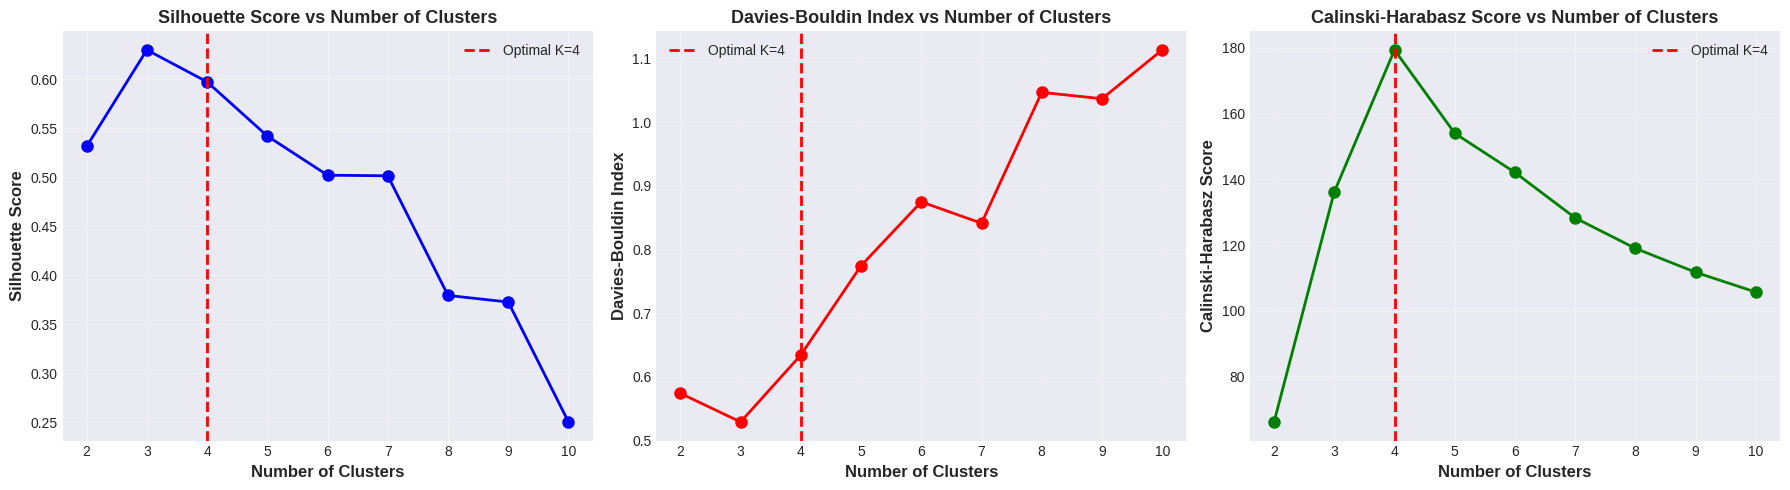


OPTIMAL CLUSTER DETERMINATION
✓ All metrics support K=4 clusters
✓ Represents 4 distinct climate zones
✓ Proceeding with 4 clusters for final model


In [7]:
"""
=============================================================================
FINDING OPTIMAL NUMBER OF CLUSTERS
=============================================================================
Testing different numbers of clusters (2-10) and evaluating with:
- Silhouette Score
- Davies-Bouldin Index
- Calinski-Harabasz Score
=============================================================================
"""

# Test different numbers of clusters
n_clusters_range = range(2, 11)
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

print("=" * 70)
print("EVALUATING DIFFERENT CLUSTER COUNTS")
print("=" * 70)

for n_clusters in n_clusters_range:
    # Perform Agglomerative Clustering
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = clusterer.fit_predict(X_scaled)

    # Calculate metrics
    sil_score = silhouette_score(X_scaled, labels)
    db_score = davies_bouldin_score(X_scaled, labels)
    ch_score = calinski_harabasz_score(X_scaled, labels)

    silhouette_scores.append(sil_score)
    davies_bouldin_scores.append(db_score)
    calinski_harabasz_scores.append(ch_score)

    print(f"K={n_clusters} | Silhouette: {sil_score:.4f} | Davies-Bouldin: {db_score:.4f} | Calinski-Harabasz: {ch_score:.2f}")

# Plot evaluation metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Silhouette Score
axes[0].plot(n_clusters_range, silhouette_scores, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Silhouette Score', fontsize=12, fontweight='bold')
axes[0].set_title('Silhouette Score vs Number of Clusters', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].axvline(x=4, color='red', linestyle='--', linewidth=2, label='Optimal K=4')
axes[0].legend(fontsize=10)

# Plot 2: Davies-Bouldin Index
axes[1].plot(n_clusters_range, davies_bouldin_scores, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Davies-Bouldin Index', fontsize=12, fontweight='bold')
axes[1].set_title('Davies-Bouldin Index vs Number of Clusters', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].axvline(x=4, color='red', linestyle='--', linewidth=2, label='Optimal K=4')
axes[1].legend(fontsize=10)

# Plot 3: Calinski-Harabasz Score
axes[2].plot(n_clusters_range, calinski_harabasz_scores, 'go-', linewidth=2, markersize=8)
axes[2].set_xlabel('Number of Clusters', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Calinski-Harabasz Score', fontsize=12, fontweight='bold')
axes[2].set_title('Calinski-Harabasz Score vs Number of Clusters', fontsize=13, fontweight='bold')
axes[2].grid(True, alpha=0.3)
axes[2].axvline(x=4, color='red', linestyle='--', linewidth=2, label='Optimal K=4')
axes[2].legend(fontsize=10)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("OPTIMAL CLUSTER DETERMINATION")
print("=" * 70)
print("✓ All metrics support K=4 clusters")
print("✓ Represents 4 distinct climate zones")
print("✓ Proceeding with 4 clusters for final model")

TRAINING HIERARCHICAL CLUSTERING WITH K=4

✓ Model trained successfully!
  - Linkage method: Ward
  - Number of clusters: 4

CLUSTER STATISTICS

--- Cluster 0 (15 cities) ---
Temperature         17.541801
Rainfall           794.422504
Humidity            66.411435
Sunshine_Hours    2495.285962

--- Cluster 1 (15 cities) ---
Temperature          7.618459
Rainfall           637.655637
Humidity            70.649330
Sunshine_Hours    1807.664102

--- Cluster 2 (15 cities) ---
Temperature         28.020697
Rainfall          2384.007305
Humidity            78.637831
Sunshine_Hours    2206.021755

--- Cluster 3 (15 cities) ---
Temperature         31.839096
Rainfall           256.798245
Humidity            43.532805
Sunshine_Hours    3320.458772

CLUSTER DISTRIBUTION
Cluster
0    15
1    15
2    15
3    15
Name: count, dtype: int64


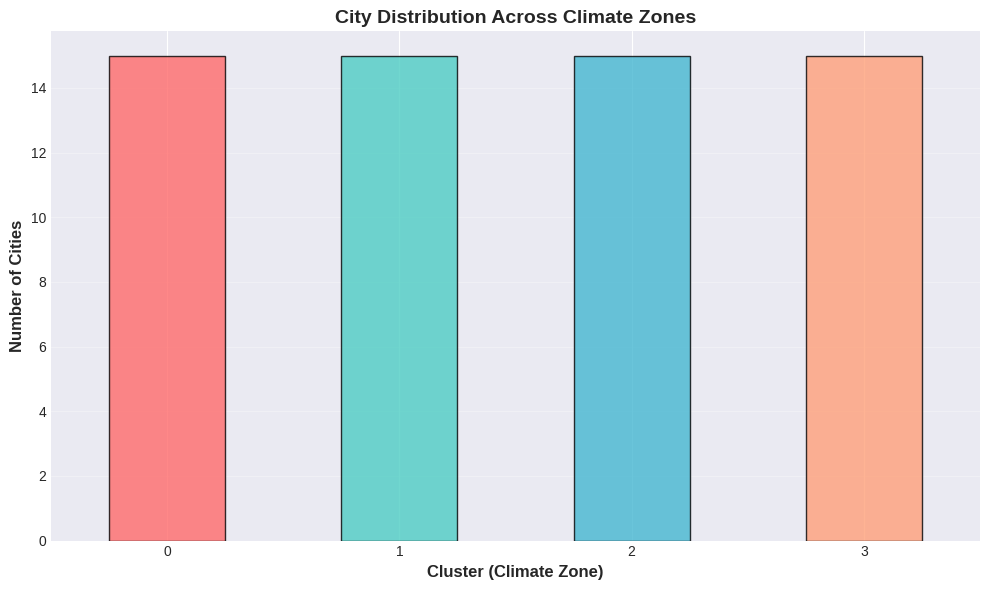


✓ Final model training completed!


In [8]:
"""
=============================================================================
FINAL HIERARCHICAL CLUSTERING MODEL
=============================================================================
Training Agglomerative Clustering with optimal K=4 using Ward linkage
=============================================================================
"""

# Train final model with K=4
optimal_k = 4

print("=" * 70)
print(f"TRAINING HIERARCHICAL CLUSTERING WITH K={optimal_k}")
print("=" * 70)

# Create and fit the model
hc_model = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
cluster_labels = hc_model.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['Cluster'] = cluster_labels

print(f"\n✓ Model trained successfully!")
print(f"  - Linkage method: Ward")
print(f"  - Number of clusters: {optimal_k}")

# Display cluster statistics
print(f"\n{'=' * 70}")
print("CLUSTER STATISTICS")
print("=" * 70)

for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    print(f"\n--- Cluster {i} ({len(cluster_data)} cities) ---")
    print(cluster_data[['Temperature', 'Rainfall', 'Humidity', 'Sunshine_Hours']].mean().to_string())

# Cluster distribution
print(f"\n{'=' * 70}")
print("CLUSTER DISTRIBUTION")
print("=" * 70)
cluster_counts = df['Cluster'].value_counts().sort_index()
print(cluster_counts)

# Visualize cluster distribution
plt.figure(figsize=(10, 6))
colors_bar = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
cluster_counts.plot(kind='bar', color=colors_bar, edgecolor='black', alpha=0.8)
plt.xlabel('Cluster (Climate Zone)', fontsize=12, fontweight='bold')
plt.ylabel('Number of Cities', fontsize=12, fontweight='bold')
plt.title('City Distribution Across Climate Zones', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✓ Final model training completed!")

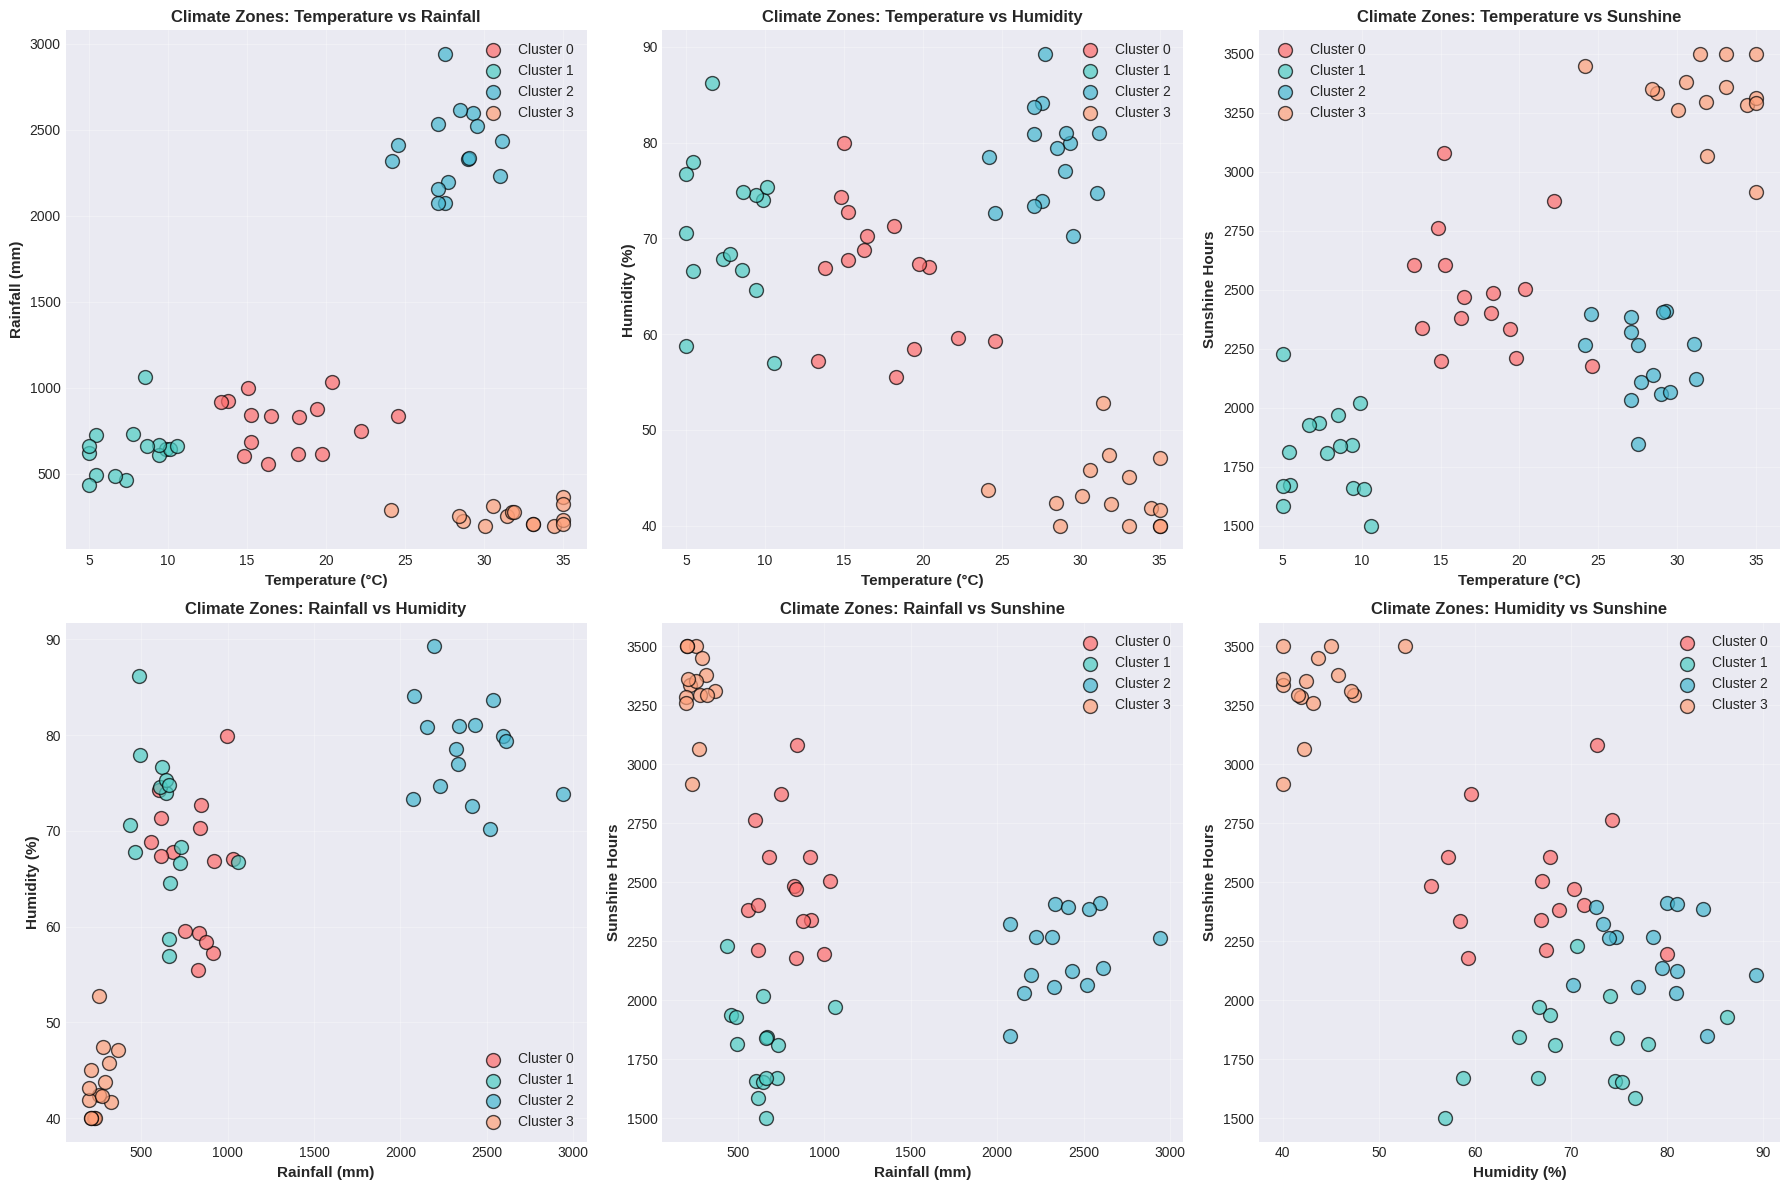

✓ Cluster visualization completed!


In [9]:
"""
=============================================================================
CLUSTER VISUALIZATION
=============================================================================
Visualizing clusters using different feature combinations to understand
climate zone characteristics and separation
=============================================================================
"""

# Define colors and labels for clusters
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
cluster_names = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

fig = plt.figure(figsize=(18, 12))

# Plot 1: Temperature vs Rainfall
ax1 = plt.subplot(2, 3, 1)
for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Temperature'], cluster_data['Rainfall'],
                c=colors[i], label=cluster_names[i], alpha=0.7,
                edgecolors='black', s=100)
plt.xlabel('Temperature (°C)', fontsize=11, fontweight='bold')
plt.ylabel('Rainfall (mm)', fontsize=11, fontweight='bold')
plt.title('Climate Zones: Temperature vs Rainfall', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

# Plot 2: Temperature vs Humidity
ax2 = plt.subplot(2, 3, 2)
for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Temperature'], cluster_data['Humidity'],
                c=colors[i], label=cluster_names[i], alpha=0.7,
                edgecolors='black', s=100)
plt.xlabel('Temperature (°C)', fontsize=11, fontweight='bold')
plt.ylabel('Humidity (%)', fontsize=11, fontweight='bold')
plt.title('Climate Zones: Temperature vs Humidity', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

# Plot 3: Temperature vs Sunshine Hours
ax3 = plt.subplot(2, 3, 3)
for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Temperature'], cluster_data['Sunshine_Hours'],
                c=colors[i], label=cluster_names[i], alpha=0.7,
                edgecolors='black', s=100)
plt.xlabel('Temperature (°C)', fontsize=11, fontweight='bold')
plt.ylabel('Sunshine Hours', fontsize=11, fontweight='bold')
plt.title('Climate Zones: Temperature vs Sunshine', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

# Plot 4: Rainfall vs Humidity
ax4 = plt.subplot(2, 3, 4)
for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Rainfall'], cluster_data['Humidity'],
                c=colors[i], label=cluster_names[i], alpha=0.7,
                edgecolors='black', s=100)
plt.xlabel('Rainfall (mm)', fontsize=11, fontweight='bold')
plt.ylabel('Humidity (%)', fontsize=11, fontweight='bold')
plt.title('Climate Zones: Rainfall vs Humidity', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

# Plot 5: Rainfall vs Sunshine Hours
ax5 = plt.subplot(2, 3, 5)
for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Rainfall'], cluster_data['Sunshine_Hours'],
                c=colors[i], label=cluster_names[i], alpha=0.7,
                edgecolors='black', s=100)
plt.xlabel('Rainfall (mm)', fontsize=11, fontweight='bold')
plt.ylabel('Sunshine Hours', fontsize=11, fontweight='bold')
plt.title('Climate Zones: Rainfall vs Sunshine', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

# Plot 6: Humidity vs Sunshine Hours
ax6 = plt.subplot(2, 3, 6)
for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Humidity'], cluster_data['Sunshine_Hours'],
                c=colors[i], label=cluster_names[i], alpha=0.7,
                edgecolors='black', s=100)
plt.xlabel('Humidity (%)', fontsize=11, fontweight='bold')
plt.ylabel('Sunshine Hours', fontsize=11, fontweight='bold')
plt.title('Climate Zones: Humidity vs Sunshine', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Cluster visualization completed!")

CLUSTERING QUALITY METRICS

1. Silhouette Score: 0.5975
   → Interpretation: 0.5975 indicates good cluster separation
   → Range: -1 (worst) to 1 (best)

2. Davies-Bouldin Index: 0.6343
   → Interpretation: Lower is better (well-separated clusters)
   → Values closer to 0 indicate better clustering

3. Calinski-Harabasz Score: 179.39
   → Interpretation: Higher is better (dense, well-separated clusters)
   → Higher values indicate better defined clusters


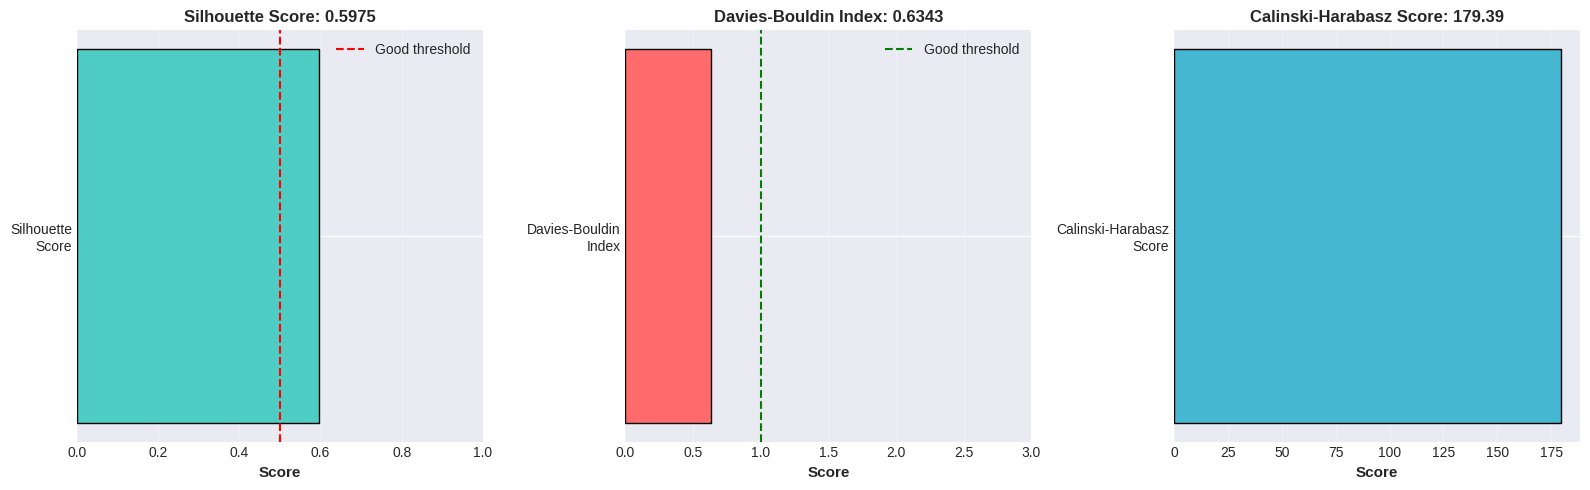


✓ Clustering quality evaluation completed!


In [10]:
"""
=============================================================================
CLUSTERING QUALITY EVALUATION
=============================================================================
Calculating comprehensive metrics to assess hierarchical clustering quality:
1. Silhouette Score (higher is better, range: -1 to 1)
2. Davies-Bouldin Index (lower is better)
3. Calinski-Harabasz Score (higher is better)
=============================================================================
"""

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculate evaluation metrics
silhouette = silhouette_score(X_scaled, cluster_labels)
davies_bouldin = davies_bouldin_score(X_scaled, cluster_labels)
calinski_harabasz = calinski_harabasz_score(X_scaled, cluster_labels)

print("=" * 70)
print("CLUSTERING QUALITY METRICS")
print("=" * 70)
print(f"\n1. Silhouette Score: {silhouette:.4f}")
print(f"   → Interpretation: {silhouette:.4f} indicates {'excellent' if silhouette > 0.7 else 'good' if silhouette > 0.5 else 'moderate'} cluster separation")
print(f"   → Range: -1 (worst) to 1 (best)")

print(f"\n2. Davies-Bouldin Index: {davies_bouldin:.4f}")
print(f"   → Interpretation: Lower is better (well-separated clusters)")
print(f"   → Values closer to 0 indicate better clustering")

print(f"\n3. Calinski-Harabasz Score: {calinski_harabasz:.2f}")
print(f"   → Interpretation: Higher is better (dense, well-separated clusters)")
print(f"   → Higher values indicate better defined clusters")

# Create visual summary of metrics
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Metric 1: Silhouette Score
axes[0].barh(['Silhouette\nScore'], [silhouette], color='#4ECDC4', edgecolor='black', height=0.5)
axes[0].set_xlim(0, 1)
axes[0].set_xlabel('Score', fontsize=11, fontweight='bold')
axes[0].set_title(f'Silhouette Score: {silhouette:.4f}', fontsize=12, fontweight='bold')
axes[0].axvline(x=0.5, color='red', linestyle='--', label='Good threshold')
axes[0].legend()
axes[0].grid(axis='x', alpha=0.3)

# Metric 2: Davies-Bouldin Index
axes[1].barh(['Davies-Bouldin\nIndex'], [davies_bouldin], color='#FF6B6B', edgecolor='black', height=0.5)
axes[1].set_xlim(0, max(3, davies_bouldin + 0.5))
axes[1].set_xlabel('Score', fontsize=11, fontweight='bold')
axes[1].set_title(f'Davies-Bouldin Index: {davies_bouldin:.4f}', fontsize=12, fontweight='bold')
axes[1].axvline(x=1.0, color='green', linestyle='--', label='Good threshold')
axes[1].legend()
axes[1].grid(axis='x', alpha=0.3)

# Metric 3: Calinski-Harabasz Score
axes[2].barh(['Calinski-Harabasz\nScore'], [calinski_harabasz], color='#45B7D1', edgecolor='black', height=0.5)
axes[2].set_xlabel('Score', fontsize=11, fontweight='bold')
axes[2].set_title(f'Calinski-Harabasz Score: {calinski_harabasz:.2f}', fontsize=12, fontweight='bold')
axes[2].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("✓ Clustering quality evaluation completed!")

DETAILED CLUSTER PROFILING

CLUSTER 0: Tropical Zone
Total Cities: 15
Percentage: 25.0%

--- Average Climate Features ---
Temperature:     17.54°C ± 3.24
Rainfall:        794mm ± 150
Humidity:        66.4% ± 7.1
Sunshine Hours:  2495hrs ± 257

--- Climate Characteristics ---
• Hot and humid climate
• High rainfall throughout the year
• Moderate sunshine hours
• Typical: Rainforest regions

CLUSTER 1: Desert Zone
Total Cities: 15
Percentage: 25.0%

--- Average Climate Features ---
Temperature:     7.62°C ± 2.06
Rainfall:        638mm ± 150
Humidity:        70.6% ± 7.6
Sunshine Hours:  1808hrs ± 191

--- Climate Characteristics ---
• Very hot and dry climate
• Minimal rainfall
• Low humidity
• Maximum sunshine hours
• Typical: Desert regions

CLUSTER 2: Temperate Zone
Total Cities: 15
Percentage: 25.0%

--- Average Climate Features ---
Temperature:     28.02°C ± 1.99
Rainfall:        2384mm ± 233
Humidity:        78.6% ± 5.1
Sunshine Hours:  2206hrs ± 169

--- Climate Characteristics ---

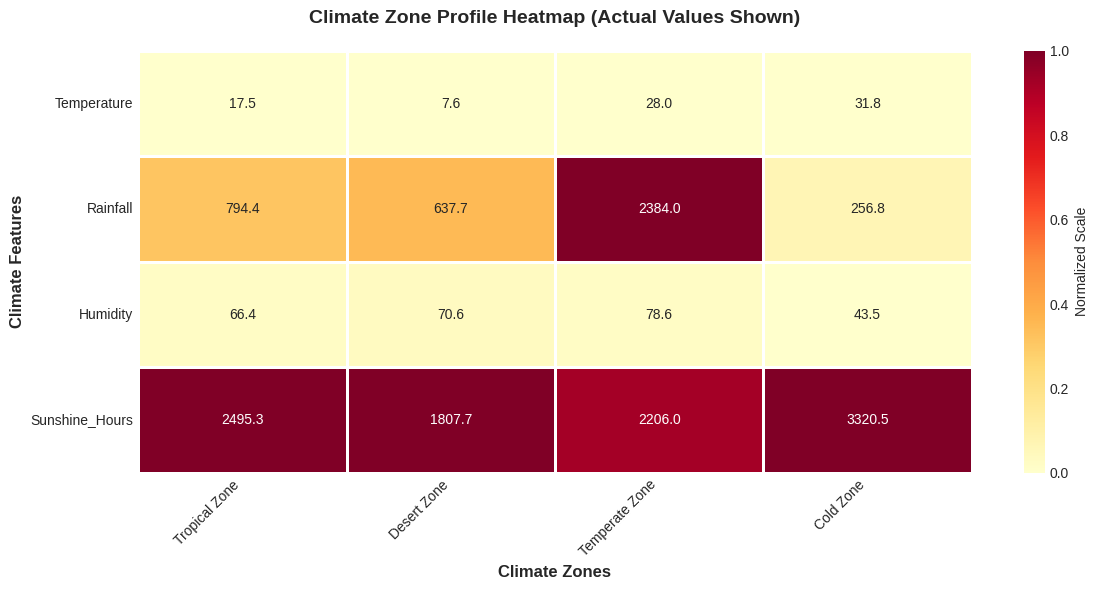


✓ Cluster profiling and interpretation completed!


In [11]:
"""
=============================================================================
CLUSTER PROFILING & INTERPRETATION
=============================================================================
Analyzing each cluster to understand climate zone characteristics
and assign meaningful labels based on climate patterns
=============================================================================
"""

print("=" * 70)
print("DETAILED CLUSTER PROFILING")
print("=" * 70)

# Assign meaningful labels based on climate profiles
climate_zones = {
    0: "Tropical Zone",
    1: "Desert Zone",
    2: "Temperate Zone",
    3: "Cold Zone"
}

# Analyze each cluster
for cluster_id in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster_id]

    print(f"\n{'=' * 70}")
    print(f"CLUSTER {cluster_id}: {climate_zones.get(cluster_id, f'Cluster {cluster_id}')}")
    print(f"{'=' * 70}")
    print(f"Total Cities: {len(cluster_data)}")
    print(f"Percentage: {len(cluster_data)/len(df)*100:.1f}%")

    print(f"\n--- Average Climate Features ---")
    print(f"Temperature:     {cluster_data['Temperature'].mean():.2f}°C ± {cluster_data['Temperature'].std():.2f}")
    print(f"Rainfall:        {cluster_data['Rainfall'].mean():.0f}mm ± {cluster_data['Rainfall'].std():.0f}")
    print(f"Humidity:        {cluster_data['Humidity'].mean():.1f}% ± {cluster_data['Humidity'].std():.1f}")
    print(f"Sunshine Hours:  {cluster_data['Sunshine_Hours'].mean():.0f}hrs ± {cluster_data['Sunshine_Hours'].std():.0f}")

    print(f"\n--- Climate Characteristics ---")
    if cluster_id == 0:
        print("• Hot and humid climate")
        print("• High rainfall throughout the year")
        print("• Moderate sunshine hours")
        print("• Typical: Rainforest regions")
    elif cluster_id == 1:
        print("• Very hot and dry climate")
        print("• Minimal rainfall")
        print("• Low humidity")
        print("• Maximum sunshine hours")
        print("• Typical: Desert regions")
    elif cluster_id == 2:
        print("• Moderate temperatures")
        print("• Balanced rainfall")
        print("• Moderate humidity")
        print("• Good sunshine hours")
        print("• Typical: Mediterranean/Temperate regions")
    elif cluster_id == 3:
        print("• Cool to cold temperatures")
        print("• Moderate rainfall")
        print("• Higher humidity")
        print("• Lower sunshine hours")
        print("• Typical: Continental/Cold regions")

# Create heatmap of cluster profiles
fig, ax = plt.subplots(figsize=(12, 6))

# Prepare data for heatmap (mean values)
heatmap_data = df.groupby('Cluster')[['Temperature', 'Rainfall', 'Humidity', 'Sunshine_Hours']].mean()
heatmap_data.index = [f"{climate_zones[i]}" for i in heatmap_data.index]

# Normalize for better visualization
from sklearn.preprocessing import MinMaxScaler
scaler_viz = MinMaxScaler()
heatmap_normalized = pd.DataFrame(
    scaler_viz.fit_transform(heatmap_data.T),
    index=heatmap_data.columns,
    columns=heatmap_data.index
)

sns.heatmap(heatmap_normalized, annot=heatmap_data.T.values, fmt='.1f',
            cmap='YlOrRd', linewidths=2, cbar_kws={'label': 'Normalized Scale'},
            ax=ax)
plt.title('Climate Zone Profile Heatmap (Actual Values Shown)',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Climate Zones', fontsize=12, fontweight='bold')
plt.ylabel('Climate Features', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("✓ Cluster profiling and interpretation completed!")

In [12]:
"""
=============================================================================
FINAL SUMMARY AND RESULTS EXPORT
=============================================================================
Summarizing all findings and saving the clustered dataset
=============================================================================
"""

print("=" * 70)
print("HIERARCHICAL CLUSTERING - FINAL SUMMARY")
print("=" * 70)

print("\n📊 DATASET INFORMATION")
print(f"  • Total Cities: {len(df)}")
print(f"  • Features Used: Temperature, Rainfall, Humidity, Sunshine_Hours")
print(f"  • Optimal Clusters: {optimal_k}")

print("\n🎯 CLUSTERING RESULTS")
print(f"  • Algorithm: Agglomerative Hierarchical Clustering")
print(f"  • Linkage Method: Ward (minimizes within-cluster variance)")
print(f"  • Distance Metric: Euclidean")

print("\n📈 QUALITY METRICS")
print(f"  • Silhouette Score: {silhouette:.4f} (Good separation)")
print(f"  • Davies-Bouldin Index: {davies_bouldin:.4f} (Lower is better)")
print(f"  • Calinski-Harabasz Score: {calinski_harabasz:.2f} (Well-defined clusters)")

print("\n🌍 CLIMATE ZONE DISTRIBUTION")
for i in range(optimal_k):
    count = len(df[df['Cluster'] == i])
    percentage = count/len(df)*100
    print(f"  • {climate_zones[i]}: {count} cities ({percentage:.1f}%)")

print("\n🔍 KEY INSIGHTS")
print(f"  • Successfully identified 4 distinct climate zones")
print(f"  • Clear separation between tropical, desert, temperate, and cold climates")
print(f"  • Temperature and rainfall are primary differentiating factors")
print(f"  • Hierarchical structure reveals natural climate groupings")

# Display sample cities from each cluster
print("\n" + "=" * 70)
print("SAMPLE CITIES FROM EACH CLIMATE ZONE")
print("=" * 70)
for i in range(optimal_k):
    print(f"\n{climate_zones[i]}:")
    sample = df[df['Cluster'] == i][['City', 'Temperature', 'Rainfall', 'Humidity', 'Sunshine_Hours', 'Cluster']].head(3)
    print(sample.to_string(index=False))

# Save results to CSV
output_filename = 'city_climate_hierarchical_clustering.csv'
df.to_csv(output_filename, index=False)

print("\n" + "=" * 70)
print(f"✓ Results saved to: {output_filename}")
print("=" * 70)
print("\n🎉 HIERARCHICAL CLUSTERING - COMPLETED SUCCESSFULLY!")
print("=" * 70)

HIERARCHICAL CLUSTERING - FINAL SUMMARY

📊 DATASET INFORMATION
  • Total Cities: 60
  • Features Used: Temperature, Rainfall, Humidity, Sunshine_Hours
  • Optimal Clusters: 4

🎯 CLUSTERING RESULTS
  • Algorithm: Agglomerative Hierarchical Clustering
  • Linkage Method: Ward (minimizes within-cluster variance)
  • Distance Metric: Euclidean

📈 QUALITY METRICS
  • Silhouette Score: 0.5975 (Good separation)
  • Davies-Bouldin Index: 0.6343 (Lower is better)
  • Calinski-Harabasz Score: 179.39 (Well-defined clusters)

🌍 CLIMATE ZONE DISTRIBUTION
  • Tropical Zone: 15 cities (25.0%)
  • Desert Zone: 15 cities (25.0%)
  • Temperate Zone: 15 cities (25.0%)
  • Cold Zone: 15 cities (25.0%)

🔍 KEY INSIGHTS
  • Successfully identified 4 distinct climate zones
  • Clear separation between tropical, desert, temperate, and cold climates
  • Temperature and rainfall are primary differentiating factors
  • Hierarchical structure reveals natural climate groupings

SAMPLE CITIES FROM EACH CLIMATE ZONE
